In [1]:
# Connecting libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# Variable declaration

N = 0
Matrix = []
Cleaner = [0,0]
Actions = ["move up", "move down", "move left", "move right", "clean"] #row_sub[0], row_add[1], col_sub[2], col_add[3]
Action = 0

In [3]:
# Matrix visualization

def show_heatmap(arr):
    sns.heatmap(arr, vmin=0, vmax=3, annot=False, cbar = False, linewidths=2, linecolor='black', cmap="Blues") 
    plt.show()

In [4]:
# Input rank matrix

def input_N():
    flag = True
    while flag:
        tmp = input("Please enter the size of the matrix \n(You can only enter 3, 4 or 5):\n")
        rezult_input = re.match("^\d+$", tmp)
        if rezult_input is not None:
            if int(rezult_input.group(0)) != 0 and int(rezult_input.group(0)) != 1 and int(rezult_input.group(0)) != 2:
                flag = False
            else:
                print("You have entered an incorrect value \nPlease try again")
        else:
            print("You have entered an incorrect value \nPlease try again")        
    return int(tmp)

In [5]:
# Сreate matrix

def create_matrix(size):
    matrix_create = np.arange(size**2).reshape((size,size)) * 0
    return matrix_create

In [6]:
# User address template

def print_enter(str):
    tmp1 = "Now you must enter the location of the "
    tmp2 = " \nThis is an input template: [row,column]"
    tmp3 = "\n'row' is a number that indicates the location of the cell in rows"
    tmp4 = "\n'column' is a number that indicates the location of the cell in columns"
    tmp5 = "\nPlease look at the picture carefully before entering"
    tmp6 = "\nThe numbers to the left of the matrix indicate the numbering of the rows"
    tmp7 = "\nThe numbers at the bottom of the matrix indicate the numbering of the columns"
    tmp8 = "\nGood luck!"
    rez_str = tmp1 + str + tmp2 + tmp3 + tmp4 + tmp5 + tmp6 + tmp7 + tmp8
    return rez_str

In [7]:
# Input cleaner's location

def input_cleaner_location(matrix):
    flag = True
    print(print_enter("cleaner"))
    
    while flag:
        location = input_row_col("cleaner")
            
        if location[0] < len(matrix) and location[1] < len(matrix):
            flag = False
            if matrix[location[0], location[1]] == 3:
                matrix[location[0], location[1]] = 2
            elif matrix[location[0], location[1]] == 0:
                matrix[location[0], location[1]] = 1
            else:
                print("Error! \nSomething wrong! \nRestart the program")
        else:
            print("You have entered an incorrect value \nPlease try again")
    show_heatmap(matrix)
    return matrix

In [8]:
# Enter rows columns for a cell

def input_row_col(str1):
    location = [0, 0]
    tmp_str = "Please enter the location of the " + str(str1) + "\n(Example: [0,1])\n"
    tmp1 = input(tmp_str)
    tmp_row = re.match('^\[\d+', tmp1).group(0)
    tmp_col = re.search('\d+\]$', tmp1).group(0)

    if tmp_row is not None and tmp_col is not None:        
        reg_row = re.search('\d+$', re.match('^\[\d+', tmp1).group(0))
        reg_col = re.match('^\d+', re.search('\d+\]$', tmp1).group(0))

        if reg_row is not None and reg_col is not None:
            location[0] = int(reg_row.group(0))
            location[1] = int(reg_col.group(0))
        else:
            print("You have entered an incorrect value \nPlease try again")
    else:
        print("You have entered an incorrect value \nPlease try again")
    return location

In [9]:
# Adding a dirt

def add_more_dirt(flag_add):
    flag_yn = True
    while flag_yn:   
        tmp2 = input("Would you like to add more dirt?" + 
                 "\nEnter y if you want to add" + 
                 "\nEnter n if you don't want to add\n")
        reg_yes = re.match('^y$', tmp2)
        reg_no = re.match('^n$', tmp2)

        if reg_yes is not None:
            flag_yn = False
            flag_add = True
        elif reg_no is not None:
            flag_yn = False
            flag_add = False
        else:
            flag_yn = True
            print("You have entered an incorrect value \nPlease try again")
    return flag_add

In [10]:
# Enter a dirt

def input_dirt(matrix):
    show_heatmap(matrix)
    flag_add = True
    print(print_enter("dirt"))
    
    while flag_add:
        location = input_row_col("dirt")
        
        if location[0] < len(matrix) and location[1] < len(matrix):
            matrix[location[0], location[1]] = 3

            flag_add = add_more_dirt(flag_add)
        else:
            print("You have entered an incorrect value \nPlease try again")

    show_heatmap(matrix)
    return matrix

In [11]:
# Search for a cleaner in a matrix

def action_location_cleaner(matrix):
    location_cleaner = [-1,-1]
    tmp = np.where(matrix == 2)[0]
    row = -1
    col = -1
    if tmp.size == 0:
        tmp = np.where(matrix == 1)[0]
        if tmp.size == 0:
            print("Error! \nSomething wrong! \nRestart the program")
        else:
            row = int(np.where(matrix == 1)[0])
            col = int(np.where(matrix == 1)[1])
    else:
        row = int(np.where(matrix == 2)[0])
        col = int(np.where(matrix == 2)[1])
    location_cleaner = [row,col]
    print(location_cleaner)
    return location_cleaner

In [12]:
# Search for a dirt in a matrix

def action_dirt_search(matrix, location_cleaner):
    action_new = -1    
    action_mass = [0, 0, 0, 0]  #row_add[1], col_add[3], col_sub[2], row_sub[0] 
    
    if location_cleaner[0] != 0:
        if matrix[(location_cleaner[0] - 1), location_cleaner[1]] == 3:
            action_new = 0

    if location_cleaner[0] != (len(matrix) - 1):
        if matrix[(location_cleaner[0] + 1), location_cleaner[1]] == 3:
            action_mass[1] = 2

    if location_cleaner[1] != 0:
        if matrix[location_cleaner[0], (location_cleaner[1] - 1)] == 3:
            action_mass[2] = 2

    if location_cleaner[1] != (len(matrix) - 1):
        if matrix[location_cleaner[0], (location_cleaner[1] + 1)] == 3:
            action_mass[3] = 2
    
    if action_new == -1:
        count = 0
        for i in action_mass:
            if i == 2:
                action_new = count
            count = count + 1
    
    return action_new

In [13]:
# Assign a new action

def action_new_action(matrix, location_cleaner):
    action_new = -1
    
    if location_cleaner[0] % 2 == 0 and location_cleaner[1] != len(matrix) - 1:
        action_new = 3
    elif location_cleaner[0] % 2 == 1 and location_cleaner[1] != 0:
        action_new = 2
    elif location_cleaner[1] == len(matrix) - 1:
        if location_cleaner[0] == len(matrix) - 1:
            action_new = 0
        elif location_cleaner[0] % 2 == 0:
            action_new = 1
    elif location_cleaner[1] == 0:
        if location_cleaner[0] == len(matrix) - 1:
            action_new = 0
        elif location_cleaner[0] % 2 == 1:
            action_new = 1

    if action_new == (-1):
        print("Error! \nSomething wrong! \nRestart the program")
    return action_new

In [14]:
# The main method of action

def action(matrix):
    location_cleaner = action_location_cleaner(matrix)
    if location_cleaner[0] != -1 and location_cleaner[1] != -1:
        Cleaner = [location_cleaner[0], location_cleaner[1]] ###########
        
        if matrix[location_cleaner[0], location_cleaner[1]] == 2:
            action_new = 4
        else: 
            action_new = action_dirt_search(matrix, location_cleaner)
            
            if action_new == (-1):
                action_new = action_new_action(matrix, location_cleaner)
    else:
        print("Error! \nSomething wrong! \nRestart the program")
    return [action_new, location_cleaner]

In [15]:
# Check the matrix on dirt

def check_matrix_to_dirt(matrix):
    flag = True
    tmp1 = np.where(matrix == 2)[0]
    tmp2 = np.where(matrix == 3)[0]
    if tmp1.size == 0 and tmp2.size == 0:
        flag = False
    return flag

In [16]:
# Performing an action

def do_action(matrix, action):
    flag = check_matrix_to_dirt(matrix)
    if flag:
        print("Now the cleaner does: " + Actions[action]) #"move up", "move down", "move left", "move right", "clean"
        if action == 4:
            matrix[Cleaner[0], Cleaner[1]] = 1
        elif action == 0 and len(matrix) % 2 == 1 and Cleaner[0] == len(matrix) - 1 and Cleaner[1] == len(matrix) - 1:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[0,0] == 3:
                matrix[0,0] = 2
            else:
                matrix[0,0] = 1
        elif action == 0 and len(matrix) % 2 == 0 and Cleaner[0] == len(matrix) - 1 and Cleaner[1] == 0:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[0,0] == 3:
                matrix[0,0] = 2
            else:
                matrix[0,0] = 1
        elif action == 0:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[Cleaner[0] - 1, Cleaner[1]] == 3:
                matrix[Cleaner[0] - 1, Cleaner[1]] = 2
            else:
                matrix[Cleaner[0] - 1, Cleaner[1]] = 1
        elif action == 1:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[Cleaner[0] + 1, Cleaner[1]] == 3:
                matrix[Cleaner[0] + 1, Cleaner[1]] = 2
            else:
                matrix[Cleaner[0] + 1, Cleaner[1]] = 1
        elif action == 2:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[Cleaner[0], Cleaner[1] - 1] == 3:
                matrix[Cleaner[0], Cleaner[1] - 1] = 2
            else:
                matrix[Cleaner[0], Cleaner[1] - 1] = 1
        elif action == 3:
            matrix[Cleaner[0], Cleaner[1]] = 0
            if matrix[Cleaner[0], Cleaner[1] + 1] == 3:
                matrix[Cleaner[0], Cleaner[1] + 1] = 2
            else:
                matrix[Cleaner[0], Cleaner[1] + 1] = 1
        else:
            print("Error! \nSomething wrong! \nRestart the program")
    else:
        print("The matrix is cleaned!")
    show_heatmap(matrix)
    return [matrix, flag]

Please enter the size of the matrix 
(You can only enter 3, 4 or 5):
5


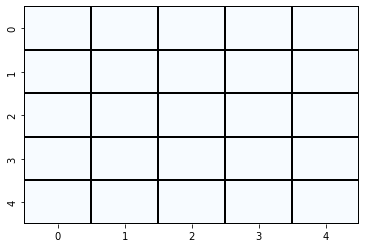

Now you must enter the location of the dirt 
This is an input template: [row,column]
'row' is a number that indicates the location of the cell in rows
'column' is a number that indicates the location of the cell in columns
Please look at the picture carefully before entering
The numbers to the left of the matrix indicate the numbering of the rows
The numbers at the bottom of the matrix indicate the numbering of the columns
Good luck!
Please enter the location of the dirt
(Example: [0,1])
[5,6]
You have entered an incorrect value 
Please try again
Please enter the location of the dirt
(Example: [0,1])
[3,3]
Would you like to add more dirt?
Enter y if you want to add
Enter n if you don't want to add
y
Please enter the location of the dirt
(Example: [0,1])
[1,0]
Would you like to add more dirt?
Enter y if you want to add
Enter n if you don't want to add
n


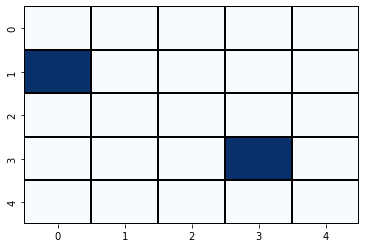

Now you must enter the location of the cleaner 
This is an input template: [row,column]
'row' is a number that indicates the location of the cell in rows
'column' is a number that indicates the location of the cell in columns
Please look at the picture carefully before entering
The numbers to the left of the matrix indicate the numbering of the rows
The numbers at the bottom of the matrix indicate the numbering of the columns
Good luck!
Please enter the location of the cleaner
(Example: [0,1])
[3,1]


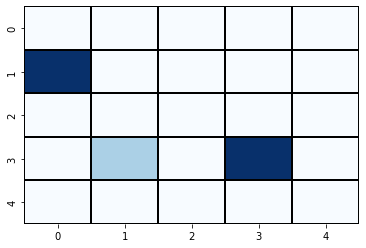

[3, 1]
Now the cleaner does: move left


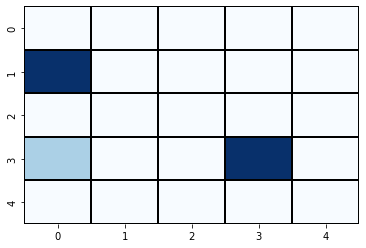

[3, 0]
Now the cleaner does: move down


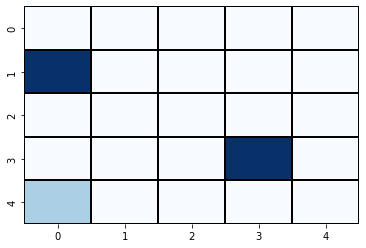

[4, 0]
Now the cleaner does: move right


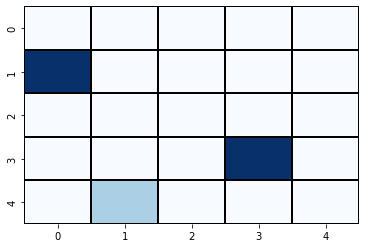

[4, 1]
Now the cleaner does: move right


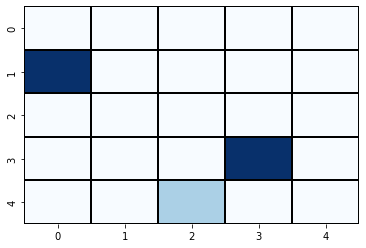

[4, 2]
Now the cleaner does: move right


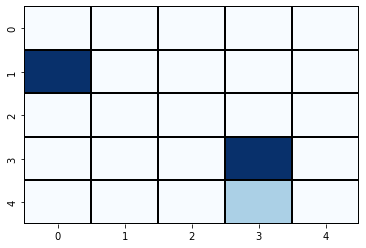

[4, 3]
Now the cleaner does: move up


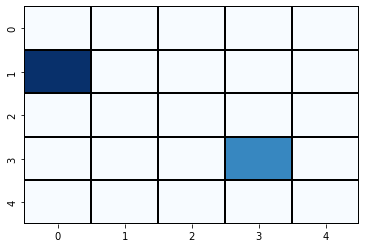

[3, 3]
Now the cleaner does: clean


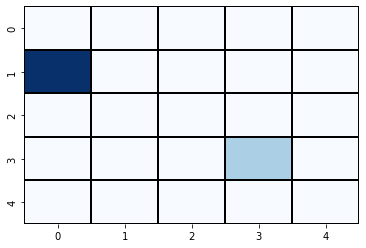

[3, 3]
Now the cleaner does: move left


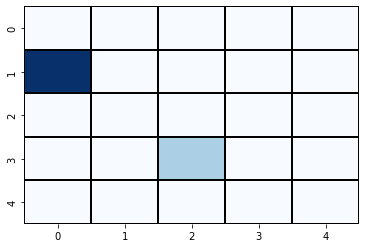

[3, 2]
Now the cleaner does: move left


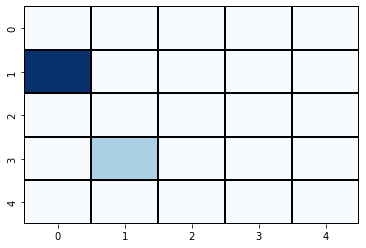

[3, 1]
Now the cleaner does: move left


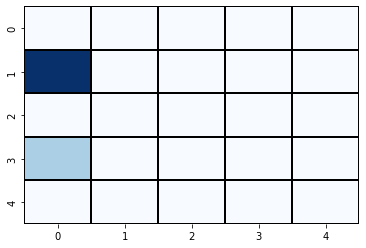

[3, 0]
Now the cleaner does: move down


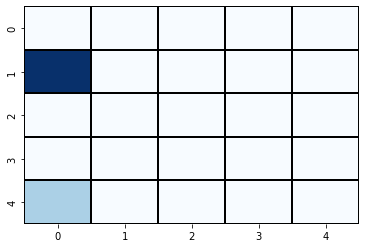

[4, 0]
Now the cleaner does: move right


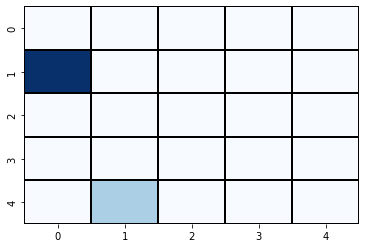

[4, 1]
Now the cleaner does: move right


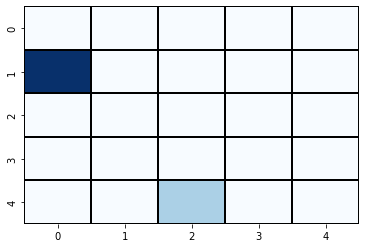

[4, 2]
Now the cleaner does: move right


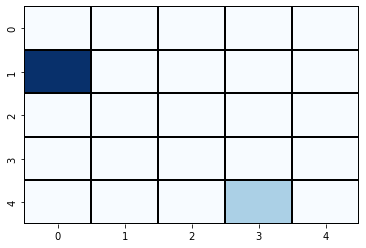

[4, 3]
Now the cleaner does: move right


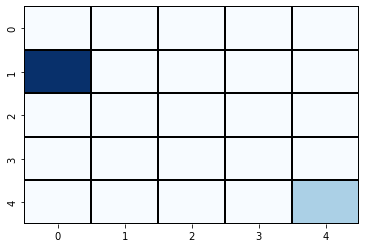

[4, 4]
Now the cleaner does: move up


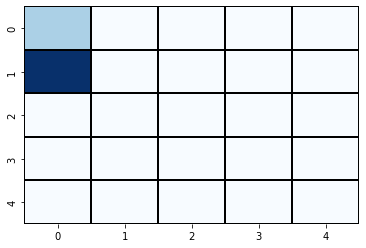

[0, 0]
Now the cleaner does: move down


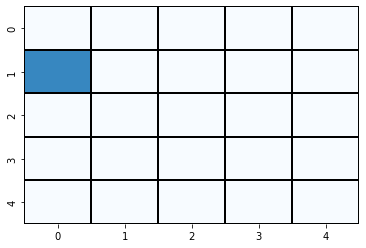

[1, 0]
Now the cleaner does: clean


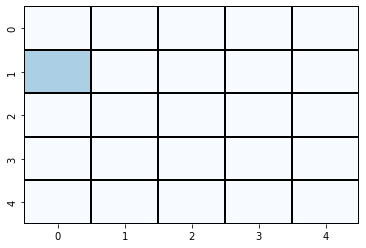

[1, 0]
The matrix is cleaned!


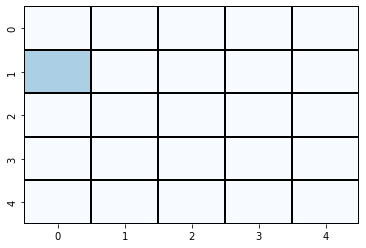

[1, 0]


In [17]:
# Algorithm of program operation

N = input_N()
Matrix = create_matrix(N)
Matrix = input_dirt(Matrix)
Matrix = input_cleaner_location(Matrix)
tmp = action(Matrix)
Action = tmp[0]
Cleaner = tmp[1]
flag = True
while flag:
    tmp2 = do_action(Matrix, Action)
    Matrix = tmp2[0]
    if tmp2[1]:
        flag = True
    else:
        flag = False
    tmp = action(Matrix)
    Action = tmp[0]
    Cleaner = tmp[1]